In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/train.csv')

In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:>

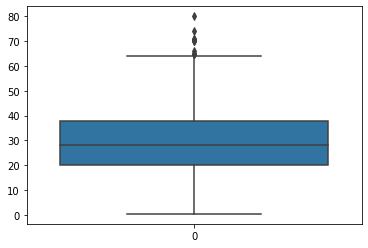

In [5]:
sns.boxplot(data = train_df['Age']) 

In [6]:
mean = train_df.Age.mean()
train_df.Age.fillna(mean, inplace = True)

In [7]:
mean = test_df.Age.mean()
test_df.Age.fillna(mean, inplace = True)

In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Dropping Not important Features.

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

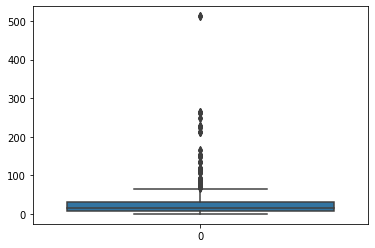

In [10]:
sns.boxplot(data = train_df.Fare)

# We can Convert Fare info into highpayers low payers middle payers.

In [11]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
x = pd.cut(train_df['Fare'].to_list(), 4)

In [13]:
train_df['Fare_band'] = x
labels = ['low', 'middle', 'upper_middle','high']
x.categories = labels
train_df['Fare_category'] = x

In [14]:
train_df.Fare_band.unique()

[(-0.512, 128.082], (256.165, 384.247], (128.082, 256.165], (384.247, 512.329]]
Categories (4, interval[float64, right]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [15]:
train_df.dtypes

PassengerId         int64
Survived            int64
Pclass              int64
Name               object
Sex                object
Age               float64
SibSp               int64
Parch               int64
Ticket             object
Fare              float64
Cabin              object
Embarked           object
Fare_band        category
Fare_category    category
dtype: object

In [16]:
train_df.Fare_band.value_counts()

(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare_band, dtype: int64

In [17]:
bins = pd.IntervalIndex.from_tuples([(-0.512, 128.082), (128.082, 256.165), (256.165, 384.247),(384.247, 512.329)])
x1 = pd.cut(test_df['Fare'].to_list(), bins)
test_df['Fair_band'] = x1

In [18]:
x1.categories = ['low', 'middle', 'upper_middle','high']
test_df['Fare_category'] = x1

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_band,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.512, 128.082]",low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(-0.512, 128.082]",low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(-0.512, 128.082]",low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(-0.512, 128.082]",low
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(-0.512, 128.082]",low


# dropping unecessary features.

In [20]:
train_df.drop(['Fare_band','Fare','Name','PassengerId'], axis = 1, inplace = True)

In [21]:
test_df.drop(['Fair_band','Fare','Name','PassengerId'], axis = 1, inplace = True)

In [22]:
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare_category
0,0,3,male,22.0,1,0,A/5 21171,NaN,S,low
1,1,1,female,38.0,1,0,PC 17599,C85,C,low
2,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,low
3,1,1,female,35.0,1,0,113803,C123,S,low
4,0,3,male,35.0,0,0,373450,NaN,S,low


In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Fare_category
0,0,3,male,22.0,1,0,A/5 21171,NaN,S,low
1,1,1,female,38.0,1,0,PC 17599,C85,C,low
2,1,3,female,26.0,0,0,STON/O2. 3101282,NaN,S,low
3,1,1,female,35.0,1,0,113803,C123,S,low
4,0,3,male,35.0,0,0,373450,NaN,S,low


In [24]:
train_df.isnull().mean()

Survived         0.000000
Pclass           0.000000
Sex              0.000000
Age              0.000000
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Cabin            0.771044
Embarked         0.002245
Fare_category    0.000000
dtype: float64

In [25]:
train_df.drop('Cabin',axis = 1, inplace = True)
test_df.drop('Cabin',axis = 1, inplace = True)

In [26]:
train_df.drop('Ticket',axis = 1, inplace = True)
test_df.drop('Ticket',axis = 1, inplace = True)

<AxesSubplot:>

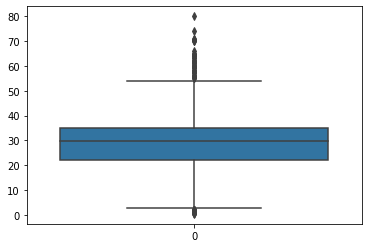

In [27]:
sns.boxplot(data = train_df['Age'])

In [28]:
bins = pd.IntervalIndex.from_tuples([(0,19), (19, 40), (40,59),(59,80)])
x2 = pd.cut(train_df['Age'].to_list(), bins)
train_df['Age_band'] = x2
x2.categories = ['teenage','young','adults','senior']
train_df['Age_Category'] = x2


In [29]:
bins = pd.IntervalIndex.from_tuples([(0,19), (19, 40), (40,59),(59,80)])
x2 = pd.cut(test_df['Age'].to_list(), bins)
test_df['Age_band'] = x2
x2.categories = ['teenage','young','adults','senior']
test_df['Age_Category'] = x2

In [30]:
# Now we can drop Age.
train_df.drop('Age',axis = 1,inplace = True)

In [31]:
train_df.drop('Age_band',axis = 1, inplace = True)
test_df.drop(['Age','Age_band'], axis = 1, inplace = True)

In [32]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Fare_category,Age_Category
0,0,3,male,1,0,S,low,young
1,1,1,female,1,0,C,low,young
2,1,3,female,0,0,S,low,young
3,1,1,female,1,0,S,low,young
4,0,3,male,0,0,S,low,young


# Train and Test Split before doing feature enginnering and later on we can check our score also.

In [33]:
X = train_df.iloc[:,1::]
y = train_df['Survived']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [35]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare_category,Age_Category
140,3,female,0,2,C,low,young
439,2,male,0,0,S,low,young
817,2,male,1,1,C,low,young
378,3,male,0,0,C,low,young
491,3,male,0,0,S,low,young


In [36]:
X_train['Sex'] = X_train.Sex.map({'female':1,'male':2})
X_test['Sex'] = X_test.Sex.map({'female':1,'male':2})

In [37]:
X_train['Embarked'].unique()

array(['C', 'S', 'Q', nan], dtype=object)

In [38]:
mode = X_train.Embarked.mode()[0]
X_train.Embarked.fillna(mode, inplace = True)
mode1 = X_test.Embarked.mode()[0]
X_test.Embarked.fillna(mode1, inplace = True)

In [39]:
X_train['Embarked'] = X_train.Embarked.map({'C': 1, 'S': 2, 'Q': 3})
X_test['Embarked'] = X_test.Embarked.map({'C': 1, 'S': 2, 'Q': 3})

In [40]:
X_train['Fare_category'].value_counts()

low             684
middle           21
upper_middle      4
high              3
Name: Fare_category, dtype: int64

In [41]:
X_train['Age_Category'].value_counts()

young      462
teenage    130
adults     100
senior      20
Name: Age_Category, dtype: int64

In [42]:
X_train['Age_Category'] = X_train['Age_Category'].map({'young':0,'teenage' :1,'adults': 2,'senior':3})

In [43]:
X_test['Age_Category'] = X_test['Age_Category'].map({'young':0,'teenage' :1,'adults': 2,'senior':3})

In [44]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare_category,Age_Category
140,3,1,0,2,1,low,0
439,2,2,0,0,2,low,0
817,2,2,1,1,1,low,0
378,3,2,0,0,1,low,0
491,3,2,0,0,2,low,0


In [45]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare_category,Age_Category
495,3,2,0,0,1,low,0
648,3,2,0,0,2,low,0
278,3,2,4,1,3,low,1
31,1,1,1,0,1,middle,0
255,3,1,0,2,1,low,0


In [46]:
X_train['Fare_category'] = X_train['Fare_category'].map({'low':0,'middle' :1,'upper_middle': 2,'high':3})
X_test['Fare_category'] = X_test['Fare_category'].map({'low':0,'middle' :1,'upper_middle': 2,'high':3})

In [47]:
X_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare_category,Age_Category
495,3,2,0,0,1,0,0
648,3,2,0,0,2,0,0
278,3,2,4,1,3,0,1
31,1,1,1,0,1,1,0
255,3,1,0,2,1,0,0


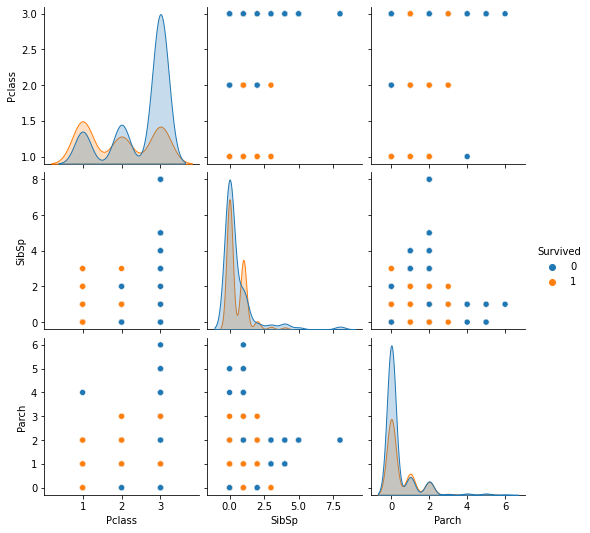

In [48]:
sns.pairplot(data = train_df,hue = 'Survived')

# Everything is done lets Apply Model Lets first Try with Random Forest Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
ref = KNeighborsClassifier()
ref.fit(X_train,y_train)

KNeighborsClassifier()

In [50]:
pred = ref.predict(X_test)

In [51]:
ref.score(X_test,y_test)

0.7988826815642458

In [52]:
ref.score(X_train,y_train)

0.8342696629213483

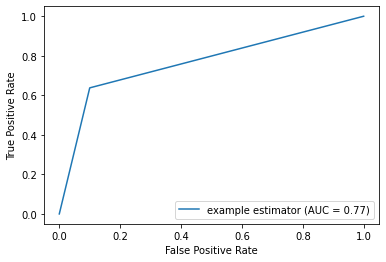

In [53]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.64      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



# Lets see if we can get better value

In [56]:
from sklearn.ensemble import RandomForestClassifier
ref = RandomForestClassifier()
ref.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
pred = ref.predict(X_test)

In [58]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



In [59]:
ref.score(X_test,y_test)

0.8156424581005587

In [60]:
ref.score(X_train,y_train)

0.8679775280898876

In [61]:
#Hyper-parameters.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num  = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [62]:
Params = {'n_estimators':n_estimators,
'max_features' :max_features,
'max_depth' :max_depth,
'min_samples_split':min_samples_split,
'min_samples_leaf' :min_samples_leaf
}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
random_rf = RandomizedSearchCV(estimator = ref, scoring = 'accuracy', param_distributions = Params, n_iter=10, n_jobs=1, cv=5, verbose=2, random_state=42)

In [64]:
random_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [65]:
random_rf.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [66]:
random_rf.score(X_train,y_train)

0.8455056179775281

In [67]:
random_rf.score(X_test,y_test)

0.8044692737430168

In [68]:
pred = random_rf.predict(X_test)

In [69]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       110
           1       0.83      0.62      0.71        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



In [70]:
from sklearn.ensemble import RandomForestClassifier
ref = RandomForestClassifier(n_estimators = 200, max_depth = 15, min_samples_split = 15, min_samples_leaf = 1)
ref.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=200)

In [71]:
pred = ref.predict(X_test)

In [72]:
print(classification_report(y_test,pred)) 

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       110
           1       0.82      0.65      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [73]:
ref.score(X_train,y_train)

0.8539325842696629

In [74]:
new_test =pd.read_csv('test.csv')
x_test = test_df

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
x_test['PassengerId'] = new_test['PassengerId']

In [ ]:
x_test.Fare_category.fillna('low',inplace = True)

In [ ]:
x_test['Sex'] = x_test.Sex.map({'female':1,'male':2})
x_test['Embarked'] = x_test.Embarked.map({'C': 1, 'S': 2, 'Q': 3})
x_test['Age_Category'] = x_test['Age_Category'].map({'young':0,'teenage' :1,'adults': 2,'senior':3})
x_test['Fare_category'] = x_test['Fare_category'].map({'low':0,'middle' :1,'upper_middle': 2,'high':3})

In [ ]:
test = x_test.drop('PassengerId',axis = 1)
finalpred = ref.predict(test)